### NEURAL NETWORKS AND DEEP LEARNING
### NNDL LAB Program Lists - Lab 07
### RNN Implementation
### 2448050

In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

Saving IMDB Dataset.csv.zip to IMDB Dataset.csv (1).zip


In [8]:
# Load the dataset
df = pd.read_csv("IMDB Dataset.csv (1).zip")
print("Dataset loaded successfully. Shape:", df.shape)

df.dropna(inplace=True)
print("After removing null values, shape:", df.shape)

print("First 5 rows of the dataset:")
print(df.head())

# Convert sentiments to numeric
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

Dataset loaded successfully. Shape: (50000, 2)
After removing null values, shape: (50000, 2)
First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'],
                                                    test_size=0.2, random_state=42)

# Tokenization and padding
max_words = 10000   # consider top 10k words
max_len = 500       # maximum review length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [10]:
# Build the RNN model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f} | Test Loss: {loss:.4f}")

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.5220 - loss: 0.7077 - val_accuracy: 0.5375 - val_loss: 0.6830
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.5475 - loss: 0.6820 - val_accuracy: 0.6251 - val_loss: 0.6633
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.6107 - loss: 0.6503 - val_accuracy: 0.6350 - val_loss: 0.6222
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.6773 - loss: 0.5898 - val_accuracy: 0.6481 - val_loss: 0.6093
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.7115 - loss: 0.5468 - val_accuracy: 0.6626 - val_loss: 0.6045
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6666 - loss: 0.6055
Test Accuracy: 0.6607 | Test Loss: 0.6048


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


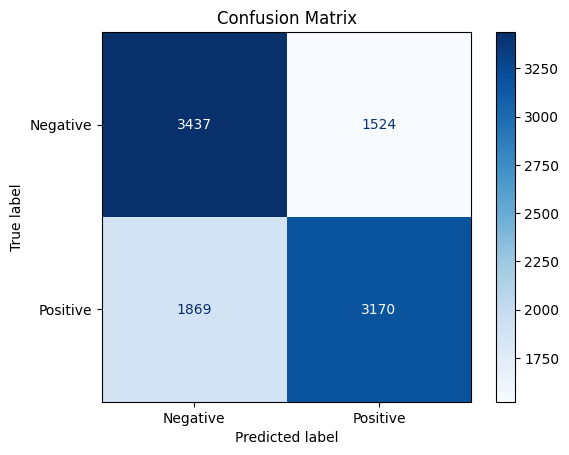

In [12]:
# Confusion matrix
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

##### Interpretation
The model is better at detecting negative reviews (high TN) than positive ones.

High FN (2563) shows the model misses many positive reviews and classifies them as negative.

Precision for positive class is moderate (65%), but recall is low (49%), meaning the model often fails to capture actual positive reviews.

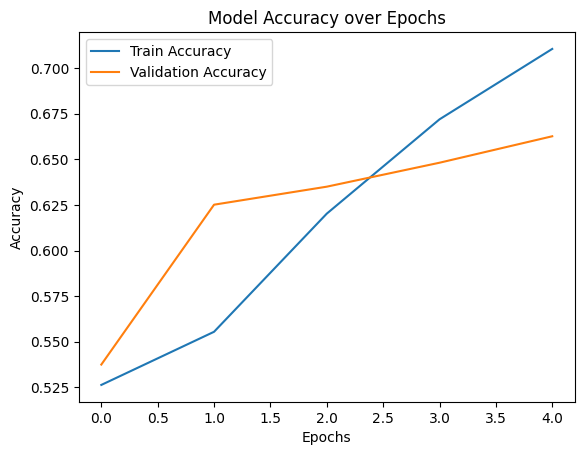

In [13]:
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy over Epochs")
plt.show()

#####Interpretation
The model is learning but only up to a certain point (~2 epochs).

After the 2nd epoch, there is no significant improvement in validation accuracy.

This suggests that the model may be underfitting (not learning enough patterns) or it has reached the limit of its capacity because SimpleRNN is not very powerful for long text sequences.

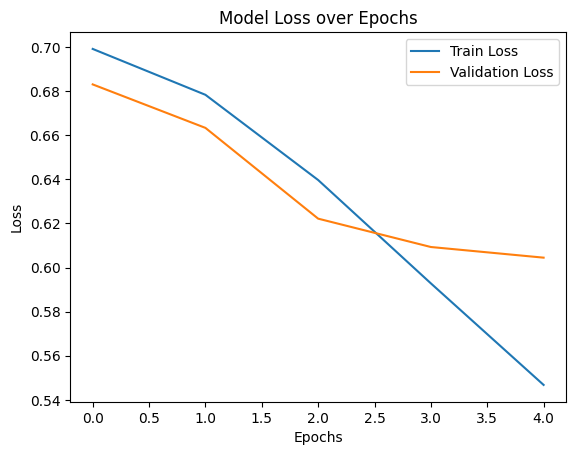

In [14]:
# Plot loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss over Epochs")
plt.show()

#####Interpretation
Epochs 0–2: Both training and validation accuracy increase steadily, indicating effective learning and good generalization in the early stages.

Epochs 2–4: Validation accuracy plateaus around 60–61%, while training accuracy continues to rise slightly (~63%). This suggests the model is starting to overfit and has reached its learning capacity.

Overall: The model learns basic sentiment patterns but cannot improve beyond a certain point due to the limitations of the SimpleRNN architecture.


### Conclusion
The model learned some patterns but struggled to capture complex dependencies in text, resulting in a low final accuracy (~61%).
To improve performance, consider using LSTM/GRU, dropout, more epochs with early stopping, and pre-trained embeddings.